In [3]:
import pandas as pd
pd.options.display.max_columns = 100

In [4]:
all_mut_df = pd.read_pickle("../data/ava/4_10_with_uniq_midpts.pkl")
display(len(all_mut_df), all_mut_df.head())

3921

,index,exp,ale,flask,isolate,tech_rep,presence,Position,Mutation Type,Sequence Change,Details,mutation target annotation,Reference Seq,sample,sample type,exp ALE,coding,range,gene RegulonDB ID,genetic features,oriC,pseudogene,TFBS,promoter,RBS,attenuator terminator,terminator,genetic,genomic features,genetic feature links,operons,operon links,regulators,regulator links,pathways,pathway links,COGs,COG links,imodulons,imodulon links,EC numbers,EC number links,products,product links,temperature,carbon-source,supplement,strain-description,taxonomy-id,base-media,nitrogen-source,phosphorous-source,sulfur-source,calcium-source
0,9,42C,1,124,1,1,1.0,702352,DEL,Δ21 bp,coding (380‑400/1149 nt),nagA,NaN,1 124 1 1,clone,42C 1,True,"(702352, 702372)",{ECK120000625},"[{'name': 'nagA', 'RegulonDB ID': 'ECK12000062...",False,False,{},{},{},{},{},True,"[{'name': 'nagA', 'RegulonDB ID': 'ECK12000062...",{'ECK120000625': ['ECK120000625']},"[{'name': 'nagBAC-umpH', 'RegulonDB ID': 'ECK1...",{'ECK125162049': ['ECK120000625']},"[{'name': 'PhoP', 'significantly associated co...","{'NagC': ['ECK125162049'], 'CRP': ['ECK1251620...","[{'name': 'Galactose metabolism', 'significant...","{'Galactose metabolism': ['ECK125162049'], 'Am...",[{'name': 'Carbohydrate transport and metaboli...,{'Carbohydrate transport and metabolism': ['EC...,"[{'name': 'NagC/TyrR', 'significantly associat...",{'NagC/TyrR': ['nagBAC-umpH']},"[{'name': '3.5.1.25', 'significantly associate...","{'3.5.1.25': ['ECK125162049', 'ECK125162049']}",[{'name': 'N-acetylglucosamine-6-phosphate dea...,{'N-acetylglucosamine-6-phosphate deacetylase ...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
1,10,42C,1,124,1,1,1.0,1308318,SNP,G→C,R110G (CGT→GGT),clsA,NaN,1 124 1 1,clone,42C 1,True,"(1308318, 1308318)",{ECK120001556},"[{'name': 'clsA', 'RegulonDB ID': 'ECK12000155...",False,False,{},{},{},{},{},True,"[{'name': 'clsA', 'RegulonDB ID': 'ECK12000155...",{'ECK120001556': ['ECK120001556']},"[{'name': 'clsA-yciU', 'RegulonDB ID': 'ECK125...",{'ECK125147415': ['ECK120001556']},[],{},[],{},[{'name': 'Lipid transport and metabolism'}],{'Lipid transport and metabolism': ['ECK125147...,[],{},[],{},[],{},42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
2,11,42C,1,124,1,1,1.0,3815859,DEL,Δ82 bp,None,rph,NaN,1 124 1 1,clone,42C 1,True,"(3815859, 3815940)",{ECK120000854},"[{'name': 'rph', 'RegulonDB ID': 'ECK120000854...",False,False,{},{},{},{ECK125144791},{},True,"[{'name': 'rph-pyrE attenuator terminator', 'R...","{'ECK120000854': ['ECK120000854'], 'ECK1200007...","[{'name': 'rph-pyrE', 'RegulonDB ID': 'ECK1200...","{'ECK120014627': ['ECK120000854', 'ECK12000079...",[],{},"[{'name': 'Pyrimidine metabolism', 'significan...","{'Pyrimidine metabolism': ['ECK120014627'], 'D...",[{'name': 'Nucleotide transport and metabolism'}],{'Nucleotide transport and metabolism': ['ECK1...,"[{'name': 'purR-KO', 'significantly associated...","{'purR-KO': ['rph-pyrE', 'rph-pyrE']}","[{'name': '2.4.2.10', 'significantly associate...","{'2.4.2.10': ['ECK120014627', 'ECK120014627']}",[{'name': 'Orotate phosphoribosyltransferase (...,{'Orotate phosphoribosyltransferase (EC 2.4.2....,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
3,12,42C,1,124,1,1,1.0,4187550,SNP,C→T,A734V (GCG→GTG),rpoC,NaN,1 124 1 1,clone,42C 1,True,"(4187550, 4187550)",{ECK120000886},"[{'name': 'rpoC', 'RegulonDB ID': 'ECK12000088...",False,False,{},{},{},{},{},True,"[{'name': 'rpoC', 'RegulonDB ID': 'ECK12000088...",{'ECK120000886': ['ECK120000886']},"[{'name': 'rplKAJL-rpoBC', 'RegulonDB ID': 'EC...",{'ECK120016992': ['ECK120000886']},[],{},"[{'name': 'Purine metabolism', 'significantly ...","{'Purine metabolism': ['ECK120016992'], 'Pyrim...",[{'name': 'Transcription'}],{'Transcription': ['ECK120016992']},"[{'name': 'translation', 'significantl

In [5]:
FEAT_TYPES = [
    "genomic features",
    "operons",
    "pathways",
    "regulators",
#     "imodulons",
#     "EC numbers"
]  # ignoring genetic features for now since the genes get double with genomic features

In [6]:
targ_mut_df = pd.DataFrame()
for _, m in all_mut_df.iterrows():
    mut_assoc = False
    for ft in FEAT_TYPES:
        for f in m[ft]:
            if "isobutyric acid" in f["significantly associated conditions"]:
                mut_assoc = True
                break
        if mut_assoc:
            break

    if mut_assoc:
        targ_mut_df = targ_mut_df.append(m)

display(len(targ_mut_df), targ_mut_df.head())

81

,COG links,COGs,Details,EC number links,EC numbers,Mutation Type,Position,RBS,Reference Seq,Sequence Change,TFBS,ale,attenuator terminator,base-media,calcium-source,carbon-source,coding,exp,exp ALE,flask,gene RegulonDB ID,genetic,genetic feature links,genetic features,genomic features,imodulon links,imodulons,index,isolate,mutation target annotation,nitrogen-source,operon links,operons,oriC,pathway links,pathways,phosphorous-source,presence,product links,products,promoter,pseudogene,range,regulator links,regulators,sample,sample type,strain-description,sulfur-source,supplement,taxonomy-id,tech_rep,temperature,terminator
1779,{'Cell wall/membrane/envelope biogenesis': ['E...,[{'name': 'Cell wall/membrane/envelope biogene...,IS5‑mediated,"{'3.4.13.18': ['ECK120014979', 'ECK120014979',...","[{'name': '3.4.13.18', 'significantly associat...",DEL,255591.0,{ECK120014270},NC_000913,"Δ18,364 bp","{ECK120013598, ECK120012955, ECK120012953, ECK...",1.0,"{ECK125145112, ECK125145215, ECK125145219, ECK...",M9,CaCl2(0.1),glucose(2),1.0,TOL_isobutyric_acid,TOL_isobutyric_acid 1,50.0,"{ECK125135291, ECK125256958, ECK120002744, ECK...",1.0,"{'ECK120016284': ['ECK120016284'], 'ECK1200027...","[{'name': 'ykfH', 'RegulonDB ID': 'ECK12001628...","[{'name': 'phoE TFBS', 'RegulonDB ID': 'ECK120...",{'duplication-1': ['yafY-ykfBF-yafX-ykfGH-yafW...,"[{'name': 'duplication-1', 'significantly asso...",13774,2.0,"[pepD], gpt, frsA, crl, crl, phoE, proB, proA,...",NH4Cl(1),"{'ECK120029187': ['ECK120016284', 'ECK12000274...","[{'name': 'phoE', 'RegulonDB ID': 'ECK12001489...",0.0,{'Arginine and proline metabolism': ['ECK12001...,"[{'name': 'Arginine and proline metabolism', '...",KH2PO4(3) Na2HPO4(6.8),1.0,{'Cytosol nonspecific dipeptidase (EC 3.4.13.1...,[{'name': 'Cytosol nonspecific dipeptidase (EC...,"{ECK125136413, ECK120034547, ECK125109034, ECK...",0.0,"(255591, 273954)","{'Fis': ['ECK120014526', 'ECK120014526', 'ECK1...","[{'name': 'PhoB', 'significantly associated co...",1 50 2 1,clone,WT,MgSO4(0.24),isobutyric acid,511145,1.0,37 celsius,{ECK120034551}
1780,{'Carbohydrate transport and metabolism': ['EC...,[{'name': 'Carbohydrate transport and metaboli...,coding (58‑61/1413 nt),"{'2.7.1.40': ['ECK120014561', 'ECK120014561', ...","[{'name': '2.7.1.40', 'significantly associate...",MOB,1755755.0,{},NC_000913,IS5 (–) +4 bp,{},1.0,{},M9,CaCl2(0.1),glucose(2),1.0,TOL_isobutyric_acid,TOL_isobutyric_acid 1,50.0,{ECK120000795},1.0,{'ECK120000795': ['ECK120000795']},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...","[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",{},[],13770,1.0,pykF,NH4Cl(1),{'ECK120014561': ['ECK120000795']},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12001456...",0.0,{'Glycolysis / Gluconeogenesis': ['ECK12001456...,"[{'name': 'Glycolysis / Gluconeogenesis', 'sig...",KH2PO4(3) Na2HPO4(6.8),1.0,{'Pyruvate kinase (EC 2.7.1.40)': ['ECK1200145...,"[{'name': 'Pyruvate kinase (EC 2.7.1.40)', 'si...",{},0.0,"(1755755, 1755755)",{'Cra': ['ECK120014561']},"[{'name': 'Cra', 'significantly associated con...",1 50 1 1,clone,WT,MgSO4(0.24),isobutyric acid,511145,1.0,37 celsius,{}
1781,{'Carbohydrate transport and metabolism': ['EC...,[{'name': 'Carbohydrate transport and metaboli...,E314Q (GAA→CAA),"{'2.7.1.40': ['ECK120014561', 'ECK120014561', ...","[{'name': '2.7.1.40', 'significantly associate...",SNP,1756637.0,{},NC_000913,G→C,{},1.0,{},M9,CaCl2(0.1),glucose(2),1.0,TOL_isobutyric_acid,TOL_isobutyric_acid 1,50.0,{ECK120000795},1.0,{'ECK120000795': ['ECK120000795']},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...","[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",{},[],13775,2.0,pykF,NH4Cl(1),{'ECK120014561': ['ECK120000795']},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12001456...",0.0,{'Glycolysis / Gluconeogenesis': ['ECK12001456...,"[{'name': 'Glycolysis / Gluconeogenesis', 'sig...",KH2PO4(3) Na2HPO4(6.8),1.0,{'Pyruvate kinase (EC 2.7.1.40)': ['ECK1200145...,"[{'name': 'Pyruvate kinase (EC 2.7.1.40)', 'si...",{},0.0,"(1756637, 1756637)",{'Cra

In [7]:
# don't want to deal with giant deletions since their complicated networks are compounding mutation count issues. Annotated this within methods section
drop_list_indexes = list(targ_mut_df[targ_mut_df["Sequence Change"]=="Δ18,364 bp"].index)
drop_list_indexes += list(targ_mut_df[targ_mut_df["Sequence Change"]=="Δ40,006 bp"].index)
targ_mut_df = targ_mut_df.drop(drop_list_indexes)
display(len(targ_mut_df))

79

In [8]:
# Generating counts for gdmut paper's supplemental material

def _get_feat_name(feat_id, mut_feats):
    name = ''
    for d in mut_feats:
        if d["RegulonDB ID"] == feat_id:
            name = d["name"]
    return name
    

geno_feat_tot_mut_cnts = pd.DataFrame()
op_tot_mut_cnts = pd.DataFrame()
pwy_tot_mut_cnts = pd.DataFrame()
reg_tot_mut_cnts = pd.DataFrame()
# Using the individual feature columns rather than link columns because this guarantees considering all linked and non-linked features
# for each of these levels, except genomic features.
for _, m in targ_mut_df.iterrows():
    
    for geno_feat in m["genomic features"]:
        geno_feat_id = geno_feat["RegulonDB ID"]
        if geno_feat_id not in geno_feat_tot_mut_cnts.index:
            srs = pd.Series({"genomic feature name": geno_feat["name"], "mutations": 0}, name=geno_feat_id)  # Using RegulonDB ID for genomic features since their names are not unique.
            geno_feat_tot_mut_cnts = geno_feat_tot_mut_cnts.append(srs)
        geno_feat_tot_mut_cnts.at[geno_feat_id, "mutations"] += 1

    for op_id, links in m["operon links"].items():
        op_name = _get_feat_name(op_id, m["operons"])
        if op_name not in op_tot_mut_cnts.index:
            srs = pd.Series({"mutations": 0}, name=op_name)
            op_tot_mut_cnts = op_tot_mut_cnts.append(srs)
        op_tot_mut_cnts.at[op_name, "mutations"] += len(links)
        
    for pathway, links in m["pathway links"].items():
        if pathway not in pwy_tot_mut_cnts.index:
            srs = pd.Series({"mutations": 0}, name=pathway)
            pwy_tot_mut_cnts = pwy_tot_mut_cnts.append(srs)
        pwy_tot_mut_cnts.at[pathway, "mutations"] += len(links)
        
    for reg_name, links in m["regulator links"].items():
        if reg_name not in reg_tot_mut_cnts.index:
            srs = pd.Series({"mutations": 0}, name=reg_name)
            reg_tot_mut_cnts = reg_tot_mut_cnts.append(srs)
        reg_tot_mut_cnts.at[reg_name, "mutations"] += len(links)


# cleaning up after the above populating
geno_feat_tot_mut_cnts.index.name = "RegulonDB ID" # Using RegulonDB ID for genomic features since their names are not unique.
geno_feat_tot_mut_cnts["mutations"] = geno_feat_tot_mut_cnts["mutations"].astype(int)
geno_feat_tot_mut_cnts = geno_feat_tot_mut_cnts.sort_values(by=["mutations"], ascending=False)

op_tot_mut_cnts.index.name = "operon name"
op_tot_mut_cnts["mutations"] = op_tot_mut_cnts["mutations"].astype(int)
op_tot_mut_cnts = op_tot_mut_cnts.sort_values(by="mutations", ascending=False)

reg_tot_mut_cnts.index.name = "regulon name"
reg_tot_mut_cnts["mutations"] = reg_tot_mut_cnts["mutations"].astype(int)
reg_tot_mut_cnts = reg_tot_mut_cnts.sort_values(by="mutations", ascending=False)

pwy_tot_mut_cnts.index.name = "pathway name"
pwy_tot_mut_cnts["mutations"] = pwy_tot_mut_cnts["mutations"].astype(int)
pwy_tot_mut_cnts = pwy_tot_mut_cnts.sort_values(by="mutations", ascending=False)


writer = pd.ExcelWriter('../Supplementary_Tables_4_5_6_7.xlsx', engine='xlsxwriter')
frames = {"Supplementary Table 4": geno_feat_tot_mut_cnts, "Supplementary Table 5": op_tot_mut_cnts, "Supplementary Table 6": pwy_tot_mut_cnts, "Supplementary Table 7": reg_tot_mut_cnts}

for sheet, frame in  frames.items():
    frame.to_excel(writer, sheet_name = sheet)

writer.save()

In [9]:
# assoc_uniq_feat_type_d = {ft:set() for ft in FEAT_TYPES}
# for _, m in targ_mut_df.iterrows():
#     for ft in FEAT_TYPES:
#         for f in m[ft]:
#             if "isobutyric acid" in f["significantly associated conditions"]:
#                 assoc_uniq_feat_type_d[ft].add(f["name"])
# assoc_uniq_feat_type_d

In [10]:
assoc_uniq_feat_type_d = dict()
for _, m in targ_mut_df.iterrows():
    for ft in FEAT_TYPES:
        for f in m[ft]:
            
            if "isobutyric acid" in f["significantly associated conditions"]:
                
                output_feat_type = ft
                if ft == "genomic features":
                    output_feat_type = f["feature type"]
                    if output_feat_type == "unknown":
                        output_feat_type = "intergenic"
                
                if output_feat_type not in assoc_uniq_feat_type_d.keys():
                    assoc_uniq_feat_type_d[output_feat_type] = set()
                assoc_uniq_feat_type_d[output_feat_type].add(f["name"])
# assoc_uniq_feat_type_d

In [11]:
assoc_uniq_feat_type_cnt_d = dict()
assoc_uniq_feat_type_cnt_d["mutations"] = [len(targ_mut_df)]  # putting values in list for making df later
for ft in assoc_uniq_feat_type_d.keys():
    assoc_uniq_feat_type_cnt_d[ft] = [len(assoc_uniq_feat_type_d[ft])]
assoc_uniq_feat_type_cnt_d

{'mutations': [79],
 'gene': [39],
 'operons': [33],
 'pathways': [5],
 'intergenic': [6],
 'terminator': [1],
 'regulators': [9],
 'attenuator terminator': [3],
 'promoter': [4]}

In [12]:
assoc_uniq_feat_type_cnt_d["regulons"] = assoc_uniq_feat_type_cnt_d.pop("regulators")

Text(0.5, 0, '')

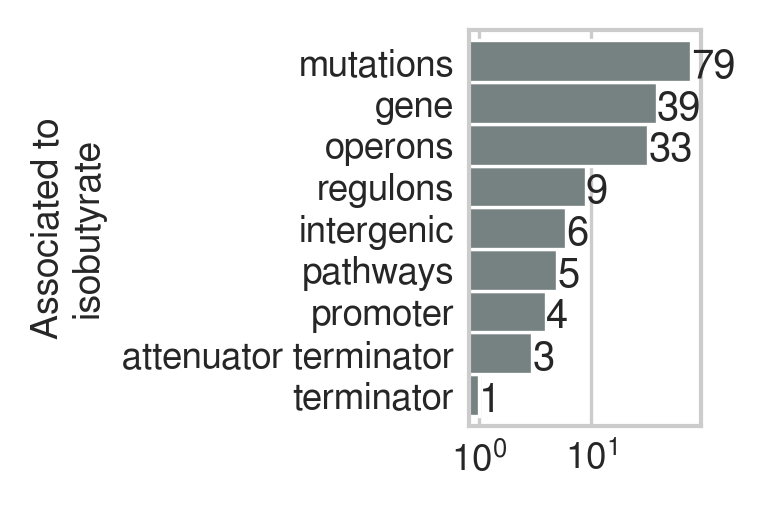

In [13]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 300
sns.set_context("paper")
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ["FreeSans"]

df = pd.DataFrame.from_dict(assoc_uniq_feat_type_cnt_d).T
df = df.sort_values(by=0, ascending=True)
ax = df.plot.barh(
    color="#768281",
    figsize=(1,1.75),
    width=1
)

# sns.despine(ax=ax, top=True, right=True, bottom=False, left=True)
ax.yaxis.grid(False)
ax.get_legend().remove()
plt.xscale('log')
ax.tick_params(axis='both', which='both', length=0)

ax.xaxis.get_major_locator().numticks = 4  # Want to get 10**0 on the Don't know why this work
    
df = df.reset_index()  # Resetting index for the below annotations to work
for i, r in df.iterrows():
    s = str(int(r[0]))
    ax.text(r[0], i-0.4, s, fontname="FreeSans")

# ax.set_title("Mutations\nand unique features\nassociated to\nglycerol", fontname="FreeSans")
ax.set_ylabel('Associated to\nisobutyrate', fontname="FreeSans", fontsize=9)
# ax.set_xticklabels([])
ax.set_xlabel('', fontname="FreeSans", fontsize=9)
# ax.xaxis.labelpad = -2